<a href="https://colab.research.google.com/github/Kavya-1708/Bankloanreport-/blob/main/Bank_loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Bank Loan Analysis Report***

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_excel("/content/financial_loan_data_excel.xlsx")

In [3]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [4]:
df.tail()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677
38575,682952,NY,INDIVIDUAL,4 years,Allen Edmonds,F,RENT,2021-07-11,2021-05-16,2021-05-16,...,F3,60 months,Verified,80000.0,0.0600,486.86,0.2099,18000,7,27679


###Metadata of data

In [5]:
print("Number of rows:",df.shape[0])

Number of rows: 38576


In [6]:
print("Number of columns:",df.shape[1])

Number of columns: 24


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

In [8]:
df.dtypes

,0
id,int64
address_state,object
application_type,object
emp_length,object
emp_title,object
grade,object
home_ownership,object
issue_date,datetime64[ns]
last_credit_pull_date,datetime64[ns]
last_payment_date,datetime64[ns]


In [9]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


***Total Loan Applications***

In [10]:
total_loan_applications = df['id'].count()
print("total_loan_applications:",total_loan_applications)

total_loan_applications: 38576


***MTD- Total Loan Applications***

In [19]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_loan_applications = mtd_data['id'].count()

print(f"MTD Loan Applications (for { latest_issue_date.strftime('%B %Y')}):{mtd_loan_applications}")

MTD Loan Applications (for December 2021):4314


***Total Funded Amount***

In [12]:
total_funded_amount = df["loan_amount"].sum()
total_funded_amount_millions = total_funded_amount/1000000
print("Total Funded Amount: ${:.2f}M".format(total_funded_amount_millions))

Total Funded Amount: $435.76M


***MTD- Total Funded Amount***

In [14]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_funded_amount = mtd_data['loan_amount'].sum()
mtd_funded_amount_millions = mtd_funded_amount/1000000

print("MTD Funded Amount : ${:.2f}M".format(mtd_funded_amount_millions))

MTD Funded Amount : $53.98M


***Total Amount Recieved***


In [20]:
total_amount_recieved = df["total_payment"].sum()
total_amount_recieved_millions = total_funded_amount/1000000
print("total amount recieved: ${:.2f}M".format(total_amount_recieved_millions))

total amount recieved: $435.76M


***MTD- Total Amount Recieved***

In [23]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_total_amount_recieved = mtd_data['total_payment'].sum()
mtd_total_amount_recieved_millions = mtd_total_amount_recieved/1000000

print(f"MTD Total Amount Recieved: ${mtd_total_amount_recieved_millions:.2f}M")

MTD Total Amount Recieved: $58.07M


***Avg Int Rate***

In [31]:
average_interest_rate = df["int_rate"].mean()*100
print("Avg Int Rate: {:.2f}%".format(average_interest_rate))

Avg Int Rate: 12.05%


***Avg Debt-to-Income Ratio (DTI)***

In [32]:
average_dti= df["dti"].mean()*100
print("Avg DTI: {:.2f}%".format(average_dti))

Avg DTI: 13.33%


***Good Loan Metrics***

In [37]:
good_loans = df[df["loan_status"].isin(["Fully Paid","Current"])]

total_loan_applications = df["id"].count()

good_loan_applications = good_loans["id"].count()
good_loan_funded_amount = good_loans["loan_amount"].sum()
good_loan_recieved = good_loans["total_payment"].sum()

good_loan_funded_amount_millions = good_loan_funded_amount/1000000
good_loan_recieved_millions = good_loan_recieved/1000000

good_loan_percentage = (good_loan_applications / total_loan_applications) * 100

print("Good Loan Applications:",good_loan_applications)
print("Good Loan Funded Amount(in millions): ${:.2f}M".format(good_loan_funded_amount_millions))
print("Good Loan Total Recieved(in millions): ${:.2f}M".format(good_loan_recieved_millions))
print("Percentage of Good Loan Applications: {:.2f}%".format(good_loan_percentage))

Good Loan Applications: 33243
Good Loan Funded Amount(in millions): $370.22M
Good Loan Total Recieved(in millions): $435.79M
Percentage of Good Loan Applications: 86.18%


***Bad Loan Metrics***

In [41]:
bad_loans = df[df["loan_status"].isin(["Charged Off"])]

total_loan_applications = df["id"].count()

bad_loan_applications = bad_loans["id"].count()
bad_loan_funded_amount = bad_loans["loan_amount"].sum()
bad_loan_recieved = bad_loans["total_payment"].sum()

bad_loan_funded_amount_millions = bad_loan_funded_amount/1000000
bad_loan_recieved_millions = bad_loan_recieved/1000000

bad_loan_percentage = (bad_loan_applications / total_loan_applications) * 100

print("Bad Loan Applications:",bad_loan_applications)
print("Bad Loan Funded Amount(in millions): ${:.2f}M".format(bad_loan_funded_amount_millions))
print("Bad Loan Total Recieved(in millions): ${:.2f}M".format(bad_loan_recieved_millions))
print("Percentage of Bad Loan Applications: {:.2f}%".format(bad_loan_percentage))

Bad Loan Applications: 5333
Bad Loan Funded Amount(in millions): $65.53M
Bad Loan Total Recieved(in millions): $37.28M
Percentage of Bad Loan Applications: 13.82%


### Visualizations

***Monthly Trend by issue date for total funded amount***

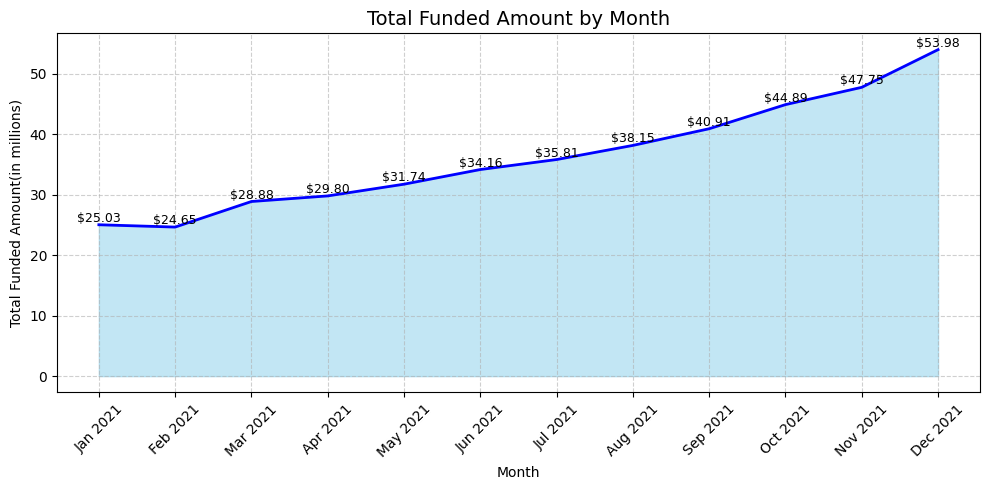

In [44]:
monthly_funded = (df.sort_values("issue_date").assign(month_name = lambda x: x["issue_date"].
          dt.strftime("%b %Y")).groupby("month_name",sort = False)["loan_amount"].sum().div(1000000)
          .reset_index(name="Loan_amount_millions"))

plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded["month_name"],monthly_funded["Loan_amount_millions"],color = "skyblue",alpha = 0.5)
plt.plot(monthly_funded["month_name"],monthly_funded["Loan_amount_millions"],color="blue",linewidth=2)

for i,row in monthly_funded.iterrows():
  plt.text(row["month_name"],row["Loan_amount_millions"],f"${row['Loan_amount_millions']:.2f}"
  ,ha="center",va="bottom",fontsize = 9, rotation =0, color="black")


plt.title("Total Funded Amount by Month", fontsize = 14)
plt.xlabel("Month")
plt.ylabel("Total Funded Amount(in millions)")
plt.xticks(ticks=range(len(monthly_funded)),labels=monthly_funded["month_name"],rotation=45)
plt.grid(True,linestyle ="--", alpha = 0.6)
plt.tight_layout()
plt.show()



***

***Monthly Trend by Issue date for Total Amount Recieved***

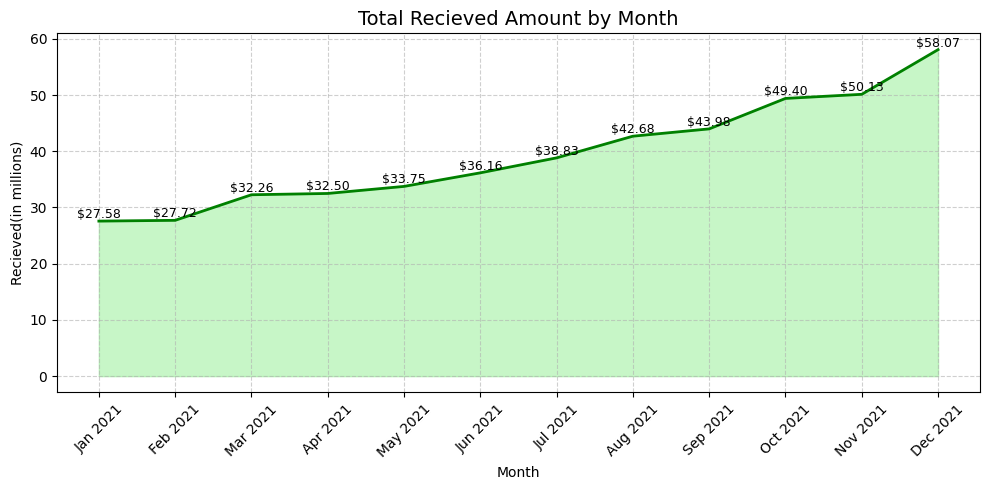

In [47]:
monthly_funded = (df.sort_values("issue_date").assign(month_name = lambda x: x["issue_date"].
          dt.strftime("%b %Y")).groupby("month_name",sort = False)["total_payment"].sum().div(1000000)
          .reset_index(name="recieved_amount_millions"))

plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded["month_name"],monthly_funded["recieved_amount_millions"],color = "lightgreen",alpha = 0.5)
plt.plot(monthly_funded["month_name"],monthly_funded["recieved_amount_millions"],color="green",linewidth=2)

for i,row in monthly_funded.iterrows():
  plt.text(row["month_name"],row["recieved_amount_millions"],f"${row['recieved_amount_millions']:.2f}"
  ,ha="center",va="bottom",fontsize = 9, rotation =0, color="black")


plt.title("Total Recieved Amount by Month", fontsize = 14)
plt.xlabel("Month")
plt.ylabel("Recieved(in millions)")
plt.xticks(ticks=range(len(monthly_funded)),labels=monthly_funded["month_name"],rotation=45)
plt.grid(True,linestyle ="--", alpha = 0.6)
plt.tight_layout()
plt.show()

***Monthly Trend by Total Loan Applications***

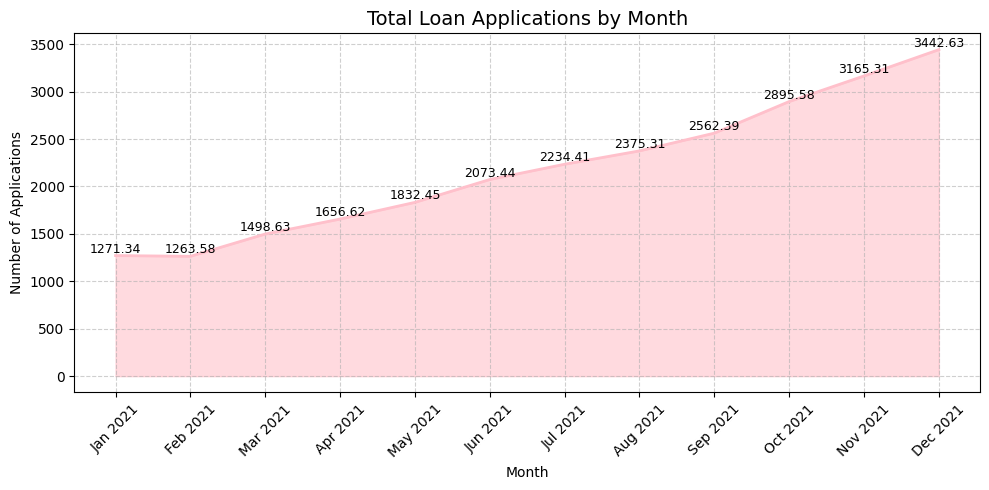

In [51]:
monthly_applications = (df.sort_values("issue_date").assign(month_name = lambda x: x["issue_date"].
          dt.strftime("%b %Y")).groupby("month_name",sort = False)["id"].sum().div(1000000)
          .reset_index(name="loan_applications_count"))

plt.figure(figsize=(10,5))
plt.fill_between(monthly_applications["month_name"],monthly_applications["loan_applications_count"],color = "lightpink",alpha = 0.5)
plt.plot(monthly_funded["month_name"],monthly_applications["loan_applications_count"],color="pink",linewidth=2)

for i,row in monthly_applications.iterrows():
  plt.text(row["month_name"],row["loan_applications_count"],f"{row['loan_applications_count']:.2f}"
  ,ha="center",va="bottom",fontsize = 9, rotation =0, color="black")


plt.title("Total Loan Applications by Month", fontsize = 14)
plt.xlabel("Month")
plt.ylabel("Number of Applications")
plt.xticks(ticks=range(len(monthly_funded)),labels=monthly_applications["month_name"],rotation=45)
plt.grid(True,linestyle ="--", alpha = 0.6)
plt.tight_layout()
plt.show()

***Regional Analysis by State for total funding amount***

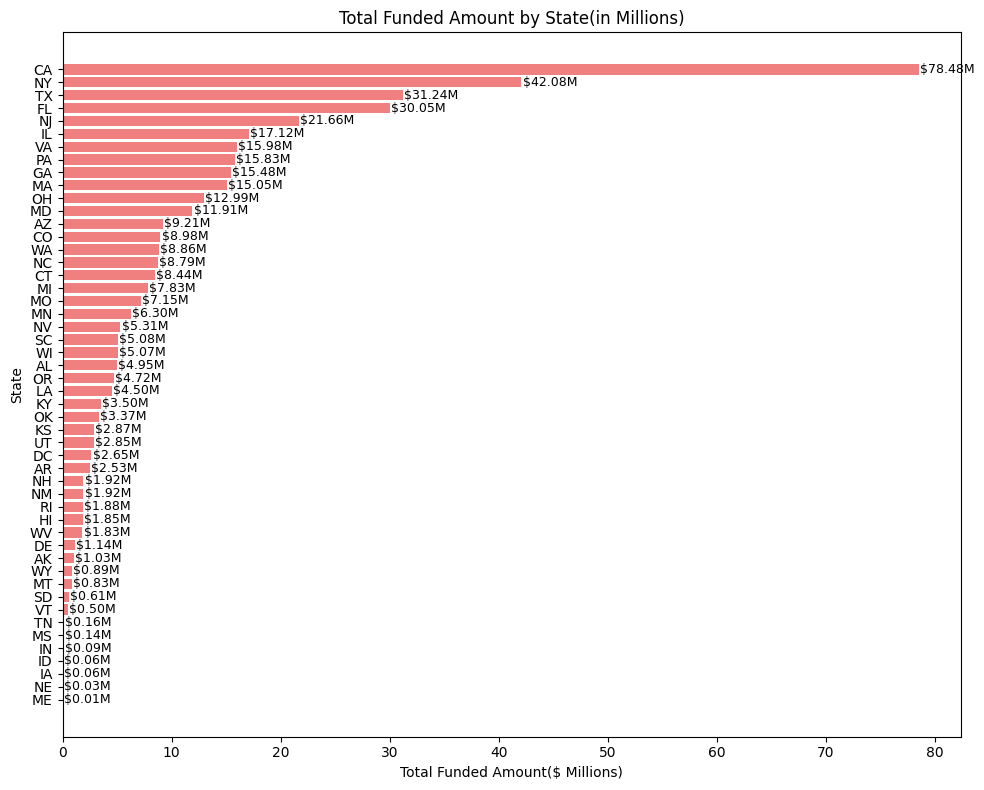

In [56]:
state_funding = df.groupby("address_state")["loan_amount"].sum().sort_values(ascending=True)
state_funding_millions = state_funding/1000000

plt.figure(figsize=(10,8))
bars = plt.barh(state_funding_millions.index, state_funding_millions.values, color = "lightcoral")

for bar in bars:
  width = bar.get_width()
  plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'${width:.2f}M', va='center', fontsize=9)

plt.title("Total Funded Amount by State(in Millions)")
plt.xlabel("Total Funded Amount($ Millions)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

***Loan Term Analysis by Total Funded Amount***

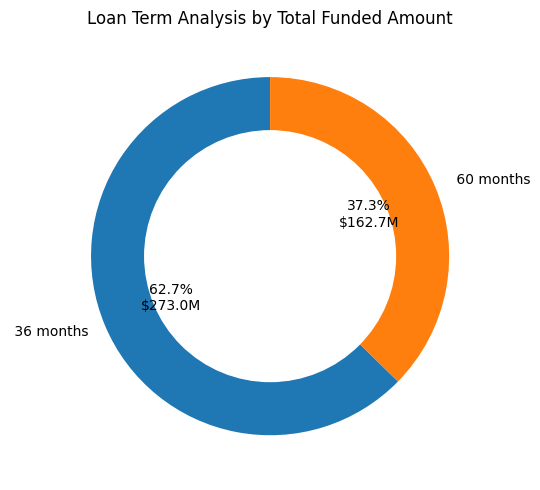

In [58]:
term_funding_millions = df.groupby("term")["loan_amount"].sum()/(1000000)

plt.figure(figsize=(10,5))
plt.pie(term_funding_millions,labels=term_funding_millions.index,autopct=lambda p: f"{p:.1f}%\n${p*term_funding_millions.sum()/100:.1f}M",startangle=90,wedgeprops={"width":0.4}
  )
plt.gca().add_artist(plt.Circle((0,0),0.70,color="white"))
plt.title("Loan Term Analysis by Total Funded Amount")
plt.tight_layout()
plt.show()

***Employee Length by Total Funded Amount***

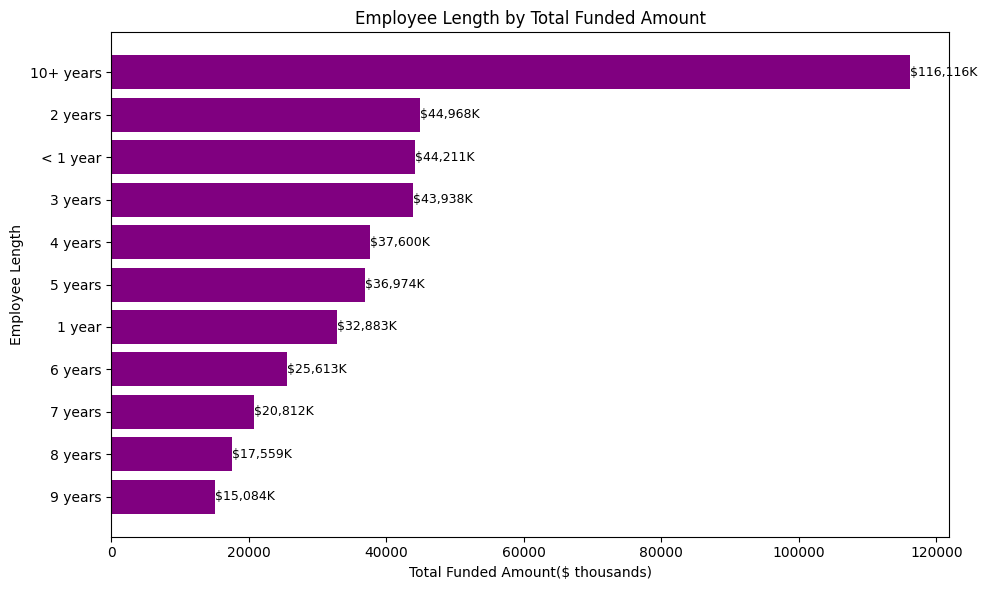

In [64]:
emp_funding = df.groupby("emp_length")["loan_amount"].sum().sort_values()/1000

plt.figure(figsize=(10,6))
bars = plt.barh(emp_funding.index, emp_funding.values, color = "purple")

for bar in bars:
  width = bar.get_width()
  plt.text(width + 5, bar.get_y() + bar.get_height()/2, f'${width:,.0f}K', va='center', fontsize=9)

plt.title("Employee Length by Total Funded Amount")
plt.xlabel("Total Funded Amount($ thousands)")
plt.ylabel("Employee Length")
plt.tight_layout()
plt.show()

***Loan Purpose by Total Funded Amount***

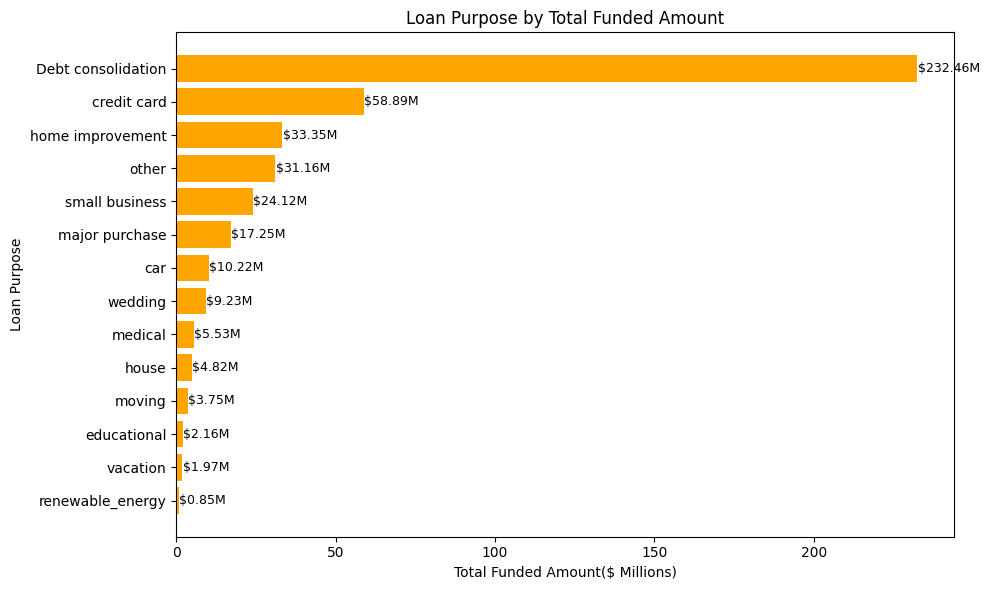

In [65]:
purpose_funding_millions = (df.groupby("purpose")["loan_amount"].sum().sort_values()/1000000)

plt.figure(figsize=(10,6))
bars = plt.barh(purpose_funding_millions.index, purpose_funding_millions.values, color = "orange")

for bar in bars:
  width = bar.get_width()
  plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'${width:.2f}M', va='center', fontsize=9)

plt.title("Loan Purpose by Total Funded Amount")
plt.xlabel("Total Funded Amount($ Millions)")
plt.ylabel("Loan Purpose")
plt.tight_layout()
plt.show()

***Home ownership by Total Funded Amount***

In [72]:
home_funding = df.groupby("home_ownership")["loan_amount"].sum().reset_index()
home_funding["loan_amount_millions"] = home_funding["loan_amount"]/1000000

fig = px.treemap(
    home_funding,
    path=["home_ownership"],
    values="loan_amount_millions",
    color="loan_amount_millions",
    color_continuous_scale="Blues",
    title="Home Ownership by Total Funded Amount"
)

fig.show()